In [10]:
# Code to read csv file into Colaboratory and various imports:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import pandas as pd
import numpy as np
import math
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

houseprices = drive.CreateFile({'id':'1MstP6lDAJ088P7ZZngkANM4-fZMz4-Mv'}) 
houseprices.GetContentFile('houseprices.applied.econ.csv')  
houseprices = pd.read_csv('houseprices.applied.econ.csv')

houseprices.info()

houseprices.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546 entries, 0 to 545
Data columns (total 12 columns):
price       546 non-null float64
lotsize     546 non-null int64
bedrooms    546 non-null int64
bathrms     546 non-null int64
stories     546 non-null int64
driveway    546 non-null object
recroom     546 non-null object
fullbase    546 non-null object
gashw       546 non-null object
airco       546 non-null object
garagepl    546 non-null int64
prefarea    546 non-null object
dtypes: float64(1), int64(5), object(6)
memory usage: 51.3+ KB


,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,42000.0,5850,3,1,2,yes,no,yes,no,no,1,no
1,66000.0,3880,3,2,2,yes,no,yes,no,no,2,no
2,83800.0,4800,3,1,1,yes,yes,yes,no,no,0,no
3,45000.0,3986,2,2,1,no,yes,yes,no,no,1,no
4,65900.0,4510,4,2,2,yes,no,yes,no,no,0,no


#Do homes with air conditioning have a higher average sales price than homes without air conditioning?

###Hypothesis: Homes with air conditioning have a higher average sales price than homes without air conditioning.

In [3]:
#Split the database into those home with AC and those without AC. 

ac_yes = houseprices[(houseprices['airco'] == 'yes')]
ac_yes.info()

ac_no = houseprices[(houseprices['airco'] == 'no')]
ac_no.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 173 entries, 373 to 545
Data columns (total 12 columns):
price       173 non-null float64
lotsize     173 non-null int64
bedrooms    173 non-null int64
bathrms     173 non-null int64
stories     173 non-null int64
driveway    173 non-null object
recroom     173 non-null object
fullbase    173 non-null object
gashw       173 non-null object
airco       173 non-null object
garagepl    173 non-null int64
prefarea    173 non-null object
dtypes: float64(1), int64(5), object(6)
memory usage: 17.6+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 373 entries, 0 to 372
Data columns (total 12 columns):
price       373 non-null float64
lotsize     373 non-null int64
bedrooms    373 non-null int64
bathrms     373 non-null int64
stories     373 non-null int64
driveway    373 non-null object
recroom     373 non-null object
fullbase    373 non-null object
gashw       373 non-null object
airco       373 non-null object
garagepl    373 non-null int

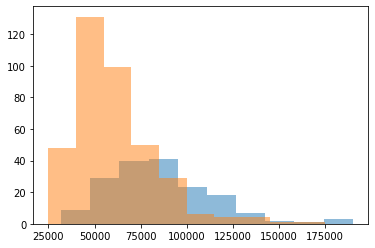

In [5]:
#See if the salesprices within each data set are normally distributed.

plt.hist(ac_yes['price'], alpha = .5)
plt.hist(ac_no['price'], alpha = .5)
plt.show()

### The ac_yes data looks normal to me but the ac_no looks pretty skewed and pretty pointy.

In [6]:
print(stats.describe(ac_yes['price']))
print(stats.describe(ac_no['price']))

DescribeResult(nobs=173, minmax=(31900.0, 190000.0), mean=85880.58959537573, variance=810167352.2317516, skewness=0.8558523643779228, kurtosis=0.9609338749117713)
DescribeResult(nobs=373, minmax=(25000.0, 175000.0), mean=59884.85254691689, variance=455341800.98626363, skewness=1.4196100209360347, kurtosis=3.448225770991252)


###The price data for ac_no houses is not normally distributed but I'll continue on with the analysis as a learning exercise.

In [7]:
# Conduct a t-test

stats.ttest_ind(ac_yes['price'], ac_no['price'])

Ttest_indResult(statistic=11.862852780650169, pvalue=4.972721571759431e-29)

In [8]:
# Find out the significance at the 95% confidence interval.

def get_95_ci(array_1, array_2):
    sample_1_n = array_1.shape[0]
    sample_2_n = array_2.shape[0]
    sample_1_mean = array_1.mean()
    sample_2_mean = array_2.mean()
    sample_1_var = array_1.var()
    sample_2_var = array_2.var()
    mean_difference = sample_2_mean - sample_1_mean
    std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))
    margin_of_error = 1.96 * std_err_difference
    ci_lower = mean_difference - margin_of_error
    ci_upper = mean_difference + margin_of_error
    return("The difference in means at the 95% confidence interval (two-tail) is between "+str(ci_lower)+" and "+str(ci_upper)+".")

get_95_ci(ac_yes['price'], ac_no['price'])

'The difference in means at the 95% confidence interval (two-tail) is between -30758.09492994282 and -21233.379166974857.'

### Finding: Houses without air conditioning sell for between 21,233 and 30,758 less than houses with air conditioning. The t-statistic is 11.8 and the p-value is <<.001. 

[[Text(0, 0, 'ac_yes'), Text(0, 0, 'ac_no')]]

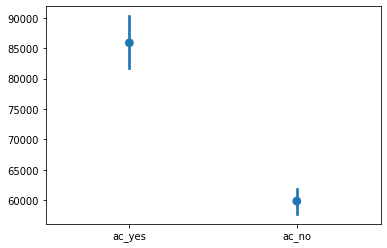

In [11]:
g = sns.pointplot(data=[ac_yes['price'],
                        ac_no['price']], join=False)
                        
g.set(xticklabels = ['ac_yes', 'ac_no'])

#Do homes with a full basement have a higher average sales price than homes without a full basement?

###Hypothesis: Homes with a full basement have a higher average sales price than homes without a full basement.

In [12]:
#Split the database into those home with AC and those without AC. 

base_yes = houseprices[(houseprices['fullbase'] == 'yes')]
base_yes.info()

base_no = houseprices[(houseprices['fullbase'] == 'no')]
base_no.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 191 entries, 0 to 438
Data columns (total 12 columns):
price       191 non-null float64
lotsize     191 non-null int64
bedrooms    191 non-null int64
bathrms     191 non-null int64
stories     191 non-null int64
driveway    191 non-null object
recroom     191 non-null object
fullbase    191 non-null object
gashw       191 non-null object
airco       191 non-null object
garagepl    191 non-null int64
prefarea    191 non-null object
dtypes: float64(1), int64(5), object(6)
memory usage: 19.4+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 355 entries, 125 to 545
Data columns (total 12 columns):
price       355 non-null float64
lotsize     355 non-null int64
bedrooms    355 non-null int64
bathrms     355 non-null int64
stories     355 non-null int64
driveway    355 non-null object
recroom     355 non-null object
fullbase    355 non-null object
gashw       355 non-null object
airco       355 non-null object
garagepl    355 non-null int

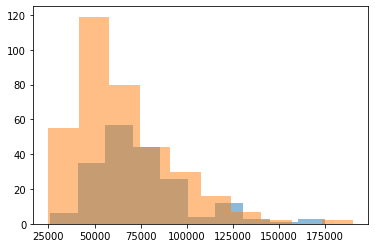

In [13]:
#See if the salesprices within each data set are normally distributed.

plt.hist(base_yes['price'], alpha = .5)
plt.hist(base_no['price'], alpha = .5)
plt.show()

In [14]:
print(stats.describe(base_yes['price']))
print(stats.describe(base_no['price']))

DescribeResult(nobs=191, minmax=(26000.0, 175000.0), mean=74894.50261780104, variance=687483535.4092036, skewness=1.299439350765169, kurtosis=2.200944427832982)
DescribeResult(nobs=355, minmax=(25000.0, 190000.0), mean=64477.58309859155, variance=690693014.1816344, skewness=1.2539001276811907, kurtosis=1.9898502593432044)


### Both data sets are normally distributed enough to proceed with a t-test.

In [18]:
# Conduct a t-test.

stats.ttest_ind(base_yes['price'], base_no['price'])


Ttest_indResult(statistic=4.420628512286621, pvalue=1.1885626562866786e-05)

In [17]:
# Find the 95% confidence interval.

get_95_ci(base_yes['price'], base_no['price'])

'The difference in means at the 95% confidence interval (two-tail) is between -15032.294775656886 and -5801.544262762097.'

###Finding: Houses without a full basement sell for between 5,801 and 15,032 less than houses with a full basement. The t-statistic is 4.42 and the p-value is <.001.

[[Text(0, 0, 'base_yes'), Text(0, 0, 'base_no')]]

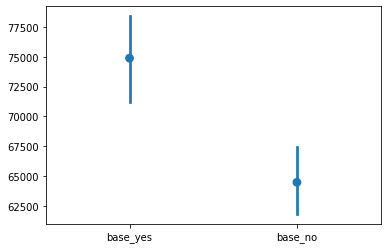

In [20]:
g = sns.pointplot(data=[base_yes['price'],
                        base_no['price']], join=False)
                        
g.set(xticklabels = ['base_yes', 'base_no'])

Other Considerations: My first thought is that while basements certainly have an effect on the price there might be other variables that have an even greater effect. It would be good to research which of the recorded data has the largest effect on average salesprice. My second thought though is that the full basement data set might be skewed towards being built in preferred areas or with larger lots, variables that might also have a positive